## Etape consiste a preparé nos donné avant de le fournir a la Machine pour son apprentissage

### Objectif
 1.Mettre les données dans un format propice au ML:
   Train/test
   Encodage
   Nettoyage des NaN
 ** Après ,si la modèle est en Overfiting(alors on va essayer de faire de la selection de variable pour ameliorer la performance de ce modèle) 
   IDEE-CODE-EVALUATION
   
 2.Améliorer la performance du modèle  
   technique:encodage,normalisation,nettoyage NAN,feature selection,(crée de nouvelle variable),feature extraction,nettoyage Outliers (CELON l'etude il est très facile de se perdre au milieu de tous ça)
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row',511)
pd.set_option('display.max_column',111)

In [174]:
data = pd.read_excel('dataset.xlsx')

In [175]:
df = data.copy()

In [176]:
df.shape

(5644, 111)

## Création des sous-ensembles (suite au EDA)[Exploratory Data Analysis]

In [177]:
missing_rate = df.isna().sum()/df.shape[0]#nombre de missing sur chaque colone axis = 0

In [178]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [179]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [180]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## TrainTest - Nettoyage - Encodage

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)#trainset 80% ,test 20%

In [237]:
trainset['SARS-Cov-2 exam result'].value_counts()#persone qui sert a detecté et compter la valeur repeter

0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64

In [184]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

### Encodage

In [185]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df 

In [186]:
encodage(df)

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df.dtypes.value_counts()

float64    31
int64       2
dtype: int64

In [213]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1 #si la personne a un ou pls maladie
    df = df.drop(viral_columns, axis=1)#suppresion  de viral(et le remettre dans un seul col)
    return df

In [214]:
def imputation(df):#dropna
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [215]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)#trainset
    y = df['SARS-Cov-2 exam result']#target
    
    print("y value compte:")
    print(y.value_counts())
    
    return X, y

In [216]:
preprocessing(df)

y value compte:
0    517
1     81
Name: SARS-Cov-2 exam result, dtype: int64


(      Patient age quantile  Hematocrit  Hemoglobin  Platelets  \
 1                       17    0.236515   -0.022340  -0.517413   
 8                        1   -1.571682   -0.774212   1.429667   
 15                       9   -0.747693   -0.586244  -0.429480   
 18                      11    0.991838    0.792188   0.072992   
 22                       9    0.190738   -0.147652  -0.668155   
 ...                    ...         ...         ...        ...   
 5602                    19    0.190738    0.165628  -0.102873   
 5614                    19   -0.289922   -0.523588   0.663397   
 5615                    15    0.717175    1.105468  -0.492289   
 5618                    17   -3.242548   -2.779203  -1.773594   
 5643                    19    0.694287    0.541564  -0.906829   
 
       Mean platelet volume   Red blood Cells  Lymphocytes  \
 1                  0.010677         0.102004     0.318366   
 8                 -1.672222        -0.850035    -0.005738   
 15                -

In [217]:
preprocessing(df)

y value compte:
0    517
1     81
Name: SARS-Cov-2 exam result, dtype: int64


(      Patient age quantile  Hematocrit  Hemoglobin  Platelets  \
 1                       17    0.236515   -0.022340  -0.517413   
 8                        1   -1.571682   -0.774212   1.429667   
 15                       9   -0.747693   -0.586244  -0.429480   
 18                      11    0.991838    0.792188   0.072992   
 22                       9    0.190738   -0.147652  -0.668155   
 ...                    ...         ...         ...        ...   
 5602                    19    0.190738    0.165628  -0.102873   
 5614                    19   -0.289922   -0.523588   0.663397   
 5615                    15    0.717175    1.105468  -0.492289   
 5618                    17   -3.242548   -2.779203  -1.773594   
 5643                    19    0.694287    0.541564  -0.906829   
 
       Mean platelet volume   Red blood Cells  Lymphocytes  \
 1                  0.010677         0.102004     0.318366   
 8                 -1.672222        -0.850035    -0.005738   
 15                -

In [218]:
df

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,est malade
0,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5640,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5641,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5642,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [219]:
X_train,y_train = preprocessing(trainset)# de trainset

<ipython-input-213-68c87e62db7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_columns].sum(axis=1) >= 1 #si la personne a un ou pls maladie


y value compte:
0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [220]:
X_test,y_test = preprocessing(testset) # de testset

y value compte:
0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-213-68c87e62db7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_columns].sum(axis=1) >= 1 #si la personne a un ou pls maladie


In [221]:
y_test.value_counts()

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64

In [222]:
y_train.shape

(487,)

In [223]:
 #plt.scatter(X_train[0] , y_train)

## Modelisation(Arbre de decision)

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier#ne necessite pas de normalisation
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [225]:
model = DecisionTreeClassifier(random_state = 0) #evaluation de la meme manier

In [226]:
model_1 = RandomForestClassifier(random_state=0)#elimination d'overfiting

In [236]:
model_2 = make_pipeline( PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0)) 

## Procédure d'évaluation

In [228]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report 
#belle metrique pour avoir un bon aperçus 
# entre le rapport de la precision et de la cessibilité ou (precision, et le recall) ,
#precision et le recall ce sont des metrique qui permet de mesuré le proportion d'erreur de type 1
# et d'erreur de type 2 dans notre dataset que notre model effectue
#c-a-d la proportion de faut positifs et de faut negatifs
#accuracy = exactitude
from sklearn.model_selection import learning_curve 
#pour comprendre que notre model est en overfiting ou bien underfiting, => decision selection de variable,ppolynom
#

In [244]:
def evaluation(model):
    model_1.fit(X_train, y_train)#de trainset
    ypred = model_1.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model_1, X_train, y_train,
                                             cv=4, scoring='f1',
                                             train_sizes=np.linspace(0.1, 1.0, 10))
    #N echantillonage
    print(N)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
#entrainement et validation avec xtrain
    plt.plot(N, val_score.mean(axis=1), label='validation score')
#entrainement et validation avec xtest
    plt.legend()
    

In [248]:
(10 * X_train.shape[0]) / 100 

48.7

[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111

[ 36  73 109 146 182 219 255 292 328 365]


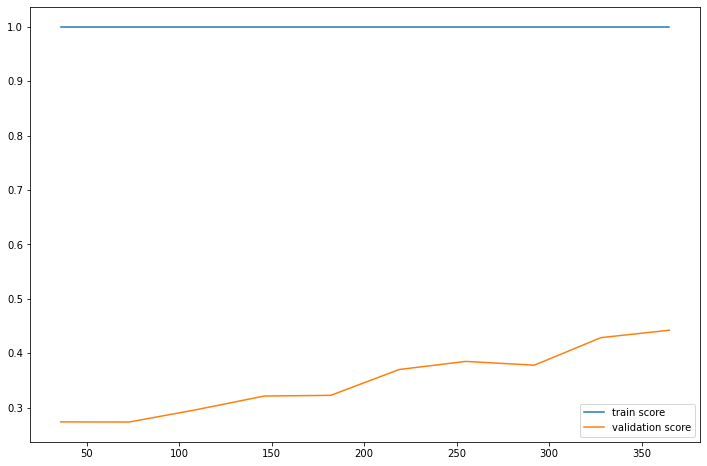

In [246]:
evaluation(model_1) #54 neg et 12 positive de testset,comparaison y_test et y_pred

#### precision = permet de reduire a max le taux de Faux Positifs , recall = permet de reduire a max le taux de faux négatifs ,score f1 = rapport entre les deux 
- Métrique:F1 ->50% et Recall->79%

In [231]:
###Learning_curve (courbe d'apprentissage)
#est ce que le modele a de la meilleur performance si on lui fornissait plus de donnée
### courbe d'apprentissage => Montre l'evolution de performance du model 
### en fonction ,de la quantité de donné qu'on lui fournits
### Typiquement ,plus la machine plus de donnée pour s' entrainé,meilleur sera sa performance
### 

In [232]:
#revision kely

In [233]:
#On va utilisé l'attribut future_importance pour selectionné les variables le plus important
#dans la decouped de l'arbre de decision
#

In [234]:
model_1.feature_importances_

array([0.04418059, 0.04977197, 0.03985046, 0.112081  , 0.04038935,
       0.04999276, 0.05181301, 0.04494368, 0.21047229, 0.02778253,
       0.03854845, 0.07104398, 0.03950262, 0.08197711, 0.04390353,
       0.05374666])

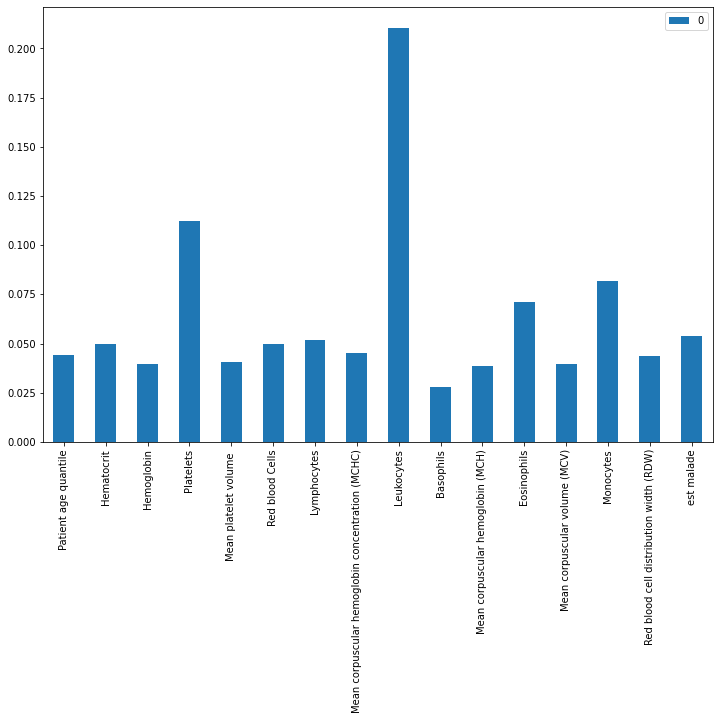

In [235]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))